<a href="https://colab.research.google.com/github/Rodfc773/ML/blob/main/Atividade3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando o abalone_dataset.csv e verificando seus dados


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

abalone_df = pd.read_csv('https://github.com/aydanomachado/mlclass/blob/master/03_Validation/abalone_dataset.csv?raw=true')

abalone_df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,type
0,M,0.535,0.420,0.150,0.6995,0.2575,0.1530,0.2400,3
1,I,0.510,0.380,0.115,0.5155,0.2150,0.1135,0.1660,1
2,I,0.185,0.130,0.045,0.0290,0.0120,0.0075,0.0095,1
3,M,0.550,0.450,0.170,0.8100,0.3170,0.1570,0.2200,3
4,I,0.535,0.415,0.150,0.5765,0.3595,0.1350,0.2250,1


In [2]:
abalone_df.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'type'],
      dtype='object')

In [3]:
abalone_df.shape

(3132, 9)

In [4]:
abalone_df.isna().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
type              0
dtype: int64

<ipython-input-5-1cbcce24a493>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


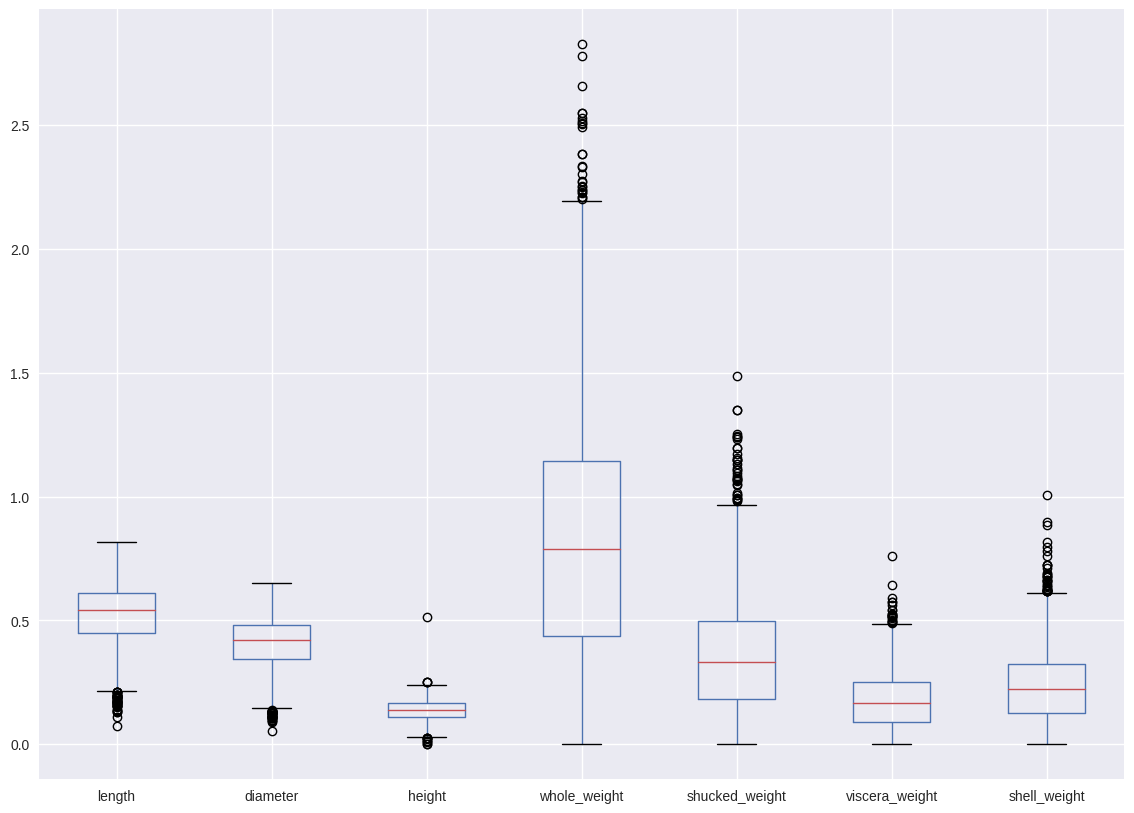

In [5]:
#Gerando o gŕafico boxplot para analise de outliers
plt.figure(figsize=(14,10))
plt.style.use('seaborn')

abalone_df.boxplot(column = ['length','diameter', 'height', 'whole_weight','shucked_weight', 'viscera_weight', 'shell_weight'])

plt.show()




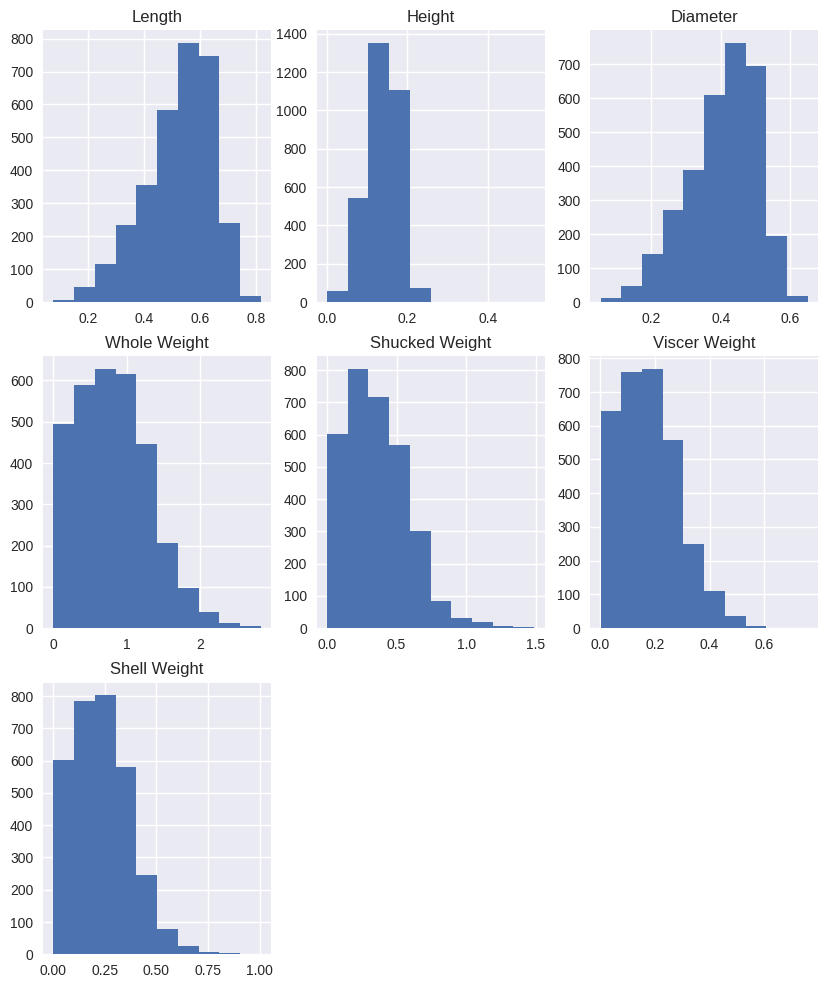

In [6]:
#Gerando o histograma das colunas de dados para ver a distribuição dos dados

figure, ax = plt.subplots(3,3, figsize=(10,12))

#Length

ax[0,0].hist(abalone_df['length'])
ax[0,0].set_title('Length')

#Height
ax[0,1].hist(abalone_df['height'])
ax[0,1].set_title('Height')

#Diameter
ax[0,2].hist(abalone_df['diameter'])
ax[0,2].set_title('Diameter')

#Whole Weight
ax[1,0].hist(abalone_df['whole_weight'])
ax[1,0].set_title('Whole Weight')

#Shucked Weight
ax[1,1].hist(abalone_df['shucked_weight'])
ax[1,1].set_title('Shucked Weight')

#Viscera Weight
ax[1,2].hist(abalone_df['viscera_weight'])
ax[1,2].set_title('Viscer Weight')

#Shell Weight
ax[2,0].hist(abalone_df['shell_weight'])
ax[2,0].set_title('Shell Weight')

#Removendo os subplots não usados
ax[2,1].remove()
ax[2,2].remove()



plt.show()


<ipython-input-7-3f923f39fb13>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = abalone_df.corr(), cmap= 'crest', annot = True)


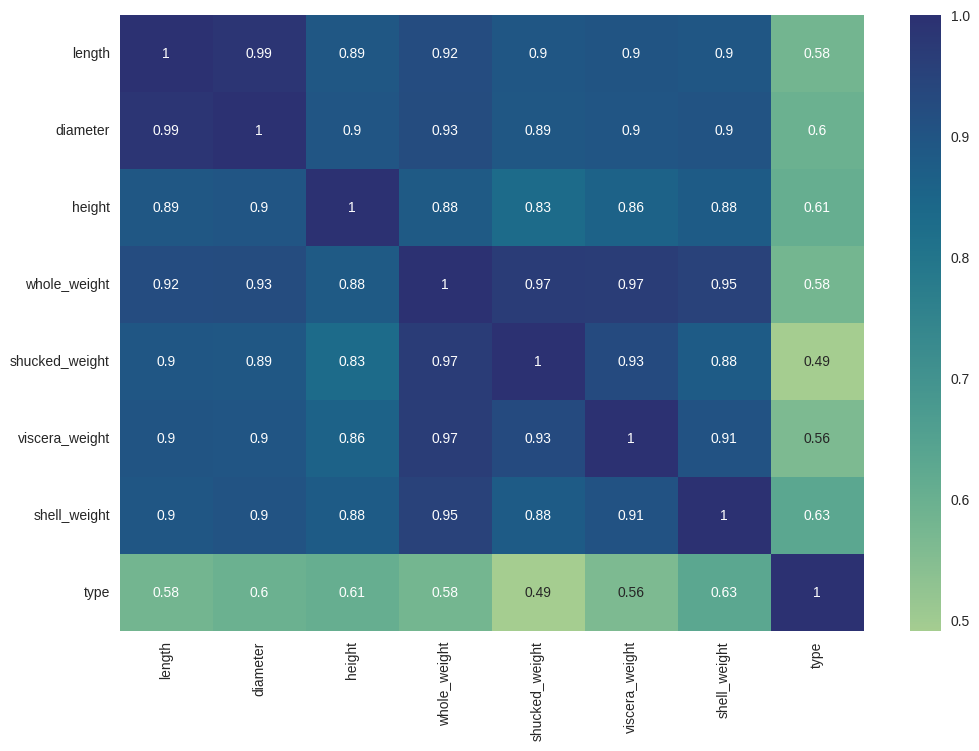

In [7]:
#Correlação das colunas

plt.figure(figsize=(12,8))
sns.heatmap(data = abalone_df.corr(), cmap= 'crest', annot = True)
plt.show()


* Coletando mais Inofrmações sobre os outliers

In [8]:
abalone_df.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'type'],
      dtype='object')

In [9]:
iqr_values = {}

for i in abalone_df.columns[1:8]:

  first_quantile = abalone_df[i].quantile(q=0.25)
  third_quantile = abalone_df[i].quantile(q=0.75)
  fiq = third_quantile - first_quantile

  iqr_values[i + '_less'] = first_quantile - 1.5 * fiq
  iqr_values[i + '_biggest'] = third_quantile + 1.5 * fiq


iqr_values

{'length_less': 0.21000000000000005,
 'length_biggest': 0.85,
 'diameter_less': 0.14249999999999996,
 'diameter_biggest': 0.6825,
 'height_less': 0.027499999999999983,
 'height_biggest': 0.24750000000000003,
 'whole_weight_less': -0.6214999999999999,
 'whole_weight_biggest': 2.1994999999999996,
 'shucked_weight_less': -0.2925,
 'shucked_weight_biggest': 0.9715,
 'viscera_weight_less': -0.14800000000000002,
 'viscera_weight_biggest': 0.489,
 'shell_weight_less': -0.1666875,
 'shell_weight_biggest': 0.6178125}

#### Verificando quantos dados são outliers

In [10]:
# Coluna length

qtd_outliers_length = abalone_df[(abalone_df['length'] < iqr_values['length_less']) | (abalone_df['length'] > iqr_values['length_biggest'])]

print(qtd_outliers_length.shape)

qtd_outliers_length

(47, 9)


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,type
2,I,0.185,0.130,0.045,0.0290,0.0120,0.0075,0.0095,1
46,I,0.165,0.110,0.020,0.0190,0.0065,0.0025,0.0050,1
121,M,0.175,0.135,0.040,0.0305,0.0110,0.0075,0.0100,1
129,I,0.170,0.105,0.035,0.0340,0.0120,0.0085,0.0050,1
341,I,0.190,0.145,0.040,0.0380,0.0165,0.0065,0.0150,1
434,M,0.180,0.125,0.050,0.0230,0.0085,0.0055,0.0100,1
500,I,0.210,0.150,0.055,0.0455,0.0200,0.0065,0.0130,1
516,I,0.200,0.145,0.060,0.0370,0.0125,0.0095,0.0110,1
536,I,0.180,0.125,0.035,0.0265,0.0095,0.0055,0.0085,1
558,I,0.200,0.155,0.040,0.0435,0.0155,0.0090,0.0070,1


In [11]:
#coluna whole_weight

qtd_outliers_whole_weight = abalone_df[(abalone_df['whole_weight'] < iqr_values['whole_weight_less']) | (abalone_df['whole_weight'] > iqr_values['whole_weight_biggest'])]

print(qtd_outliers_whole_weight.shape)


(26, 9)


In [12]:
#Fazendo o one-hot encondig na coluna sex
unique_sex_values = abalone_df['sex'].unique()

unique_sex_values

array(['M', 'I', 'F'], dtype=object)

In [13]:
hot_encoding = {}
count = 0
for i in unique_sex_values:
  hot_encoding[i] = count
  count = count + 1

hot_encoding

{'M': 0, 'I': 1, 'F': 2}

In [14]:
abalone_df['sex'] = abalone_df['sex'].apply(lambda x : hot_encoding[x])

In [15]:
abalone_df.head(5)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,type
0,0,0.535,0.420,0.150,0.6995,0.2575,0.1530,0.2400,3
1,1,0.510,0.380,0.115,0.5155,0.2150,0.1135,0.1660,1
2,1,0.185,0.130,0.045,0.0290,0.0120,0.0075,0.0095,1
3,0,0.550,0.450,0.170,0.8100,0.3170,0.1570,0.2200,3
4,1,0.535,0.415,0.150,0.5765,0.3595,0.1350,0.2250,1


## Treinando o modelo de arvore de decisão

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

target = abalone_df.pop('type')



In [17]:
X_train, X_test, y_train, y_test = train_test_split(abalone_df, target, test_size = 0.2, random_state = 42)

dtr_model_classifier = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=4)

dtr_model_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
y_pred = dtr_model_classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.6108452950558214

In [19]:

scores = cross_val_score(dtr_model_classifier, abalone_df, target, cv=8, scoring='accuracy')

# Results
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.63 (+/- 0.06)


## Random forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

model_rf_classifier = RandomForestClassifier(n_estimators=18, max_depth=4, max_features='log2')
model_rf_classifier.fit(X_train, y_train)
y_pred = model_rf_classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.6507177033492823

**Utilizando cross_validation**

In [42]:
scores_rf = cross_val_score(model_rf_classifier, abalone_df, target, cv=4, scoring='accuracy')

print("Accuracy: %0.2f (+/- %0.2f)" % (scores_rf.mean(), scores_rf.std() * 2))

Accuracy: 0.64 (+/- 0.03)


## Rede Neural

## Enviando o modelo com suas predições

In [35]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Atividade para trabalhar o pré-processamento dos dados.

Criação de modelo preditivo para diabetes e envio para verificação de peformance
no servidor.

@author: Aydano Machado <aydano.machado@gmail.com>
"""

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import requests

print('\n - Lendo o arquivo com o dataset sobre diabetes')
data_app = pd.read_csv('https://github.com/aydanomachado/mlclass/blob/master/03_Validation/abalone_app.csv?raw=true')

#realizando previsões com o arquivo de
print(' - Aplicando modelo e enviando para o servidor')
data_app['sex'] = data_app['sex'].apply(lambda x : hot_encoding[x])
y_pred = model_rf_classifier.predict(data_app)

# Enviando previsões realizadas com o modelo para o servidor
URL = "https://aydanomachado.com/mlclass/03_Validation.php"

#TODO Substituir pela sua chave aqui
DEV_KEY = "Skynet"

# json para ser enviado para o servidor
data = {'dev_key':DEV_KEY,
        'predictions':pd.Series(y_pred).to_json(orient='values')}

# Enviando requisição e salvando o objeto resposta
r = requests.post(url = URL, data = data)

# Extraindo e imprimindo o texto da resposta
pastebin_url = r.text
print(" - Resposta do servidor:\n", r.text, "\n")


 - Lendo o arquivo com o dataset sobre diabetes
 - Aplicando modelo e enviando para o servidor
 - Resposta do servidor:
 {"status":"success","dev_key":"Skynet","accuracy":0.631578947368421,"old_accuracy":0.62296650717703} 

